# Asset Maintenence

## Import the Data

I will start to explore the different tables that are available. This section was already done for Eliano class.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

data_folder = './data/'

files = os.listdir(data_folder)

In [2]:
# Because we have 7 different data sources, I will give a quick look on the columns names for each dataset
for file in files:
    print(file, ' - ', pd.read_csv(data_folder + file).columns.to_list(), ' - ', len(pd.read_csv(data_folder + file)))

asset_attribute_data_general.csv  -  ['asset_id', 'asset_install_team', 'asset_line', 'asset_material']  -  200
asset_attribute_data_usage.csv  -  ['asset_id', 'asset_trains_per_hour']  -  200
asset_attribute_data_weather.csv  -  ['asset_id', 'asset_weather_cluster']  -  200
asset_data.csv  -  ['asset_id', 'end_date', 'latitude', 'longitude', 'previous_repairs', 'previous_unplanned', 'start_date']  -  200
planned_data.csv  -  ['asset_id', 'event_date', 'event_id', 'planned']  -  2032
repair_data.csv  -  ['asset_id', 'event_date', 'event_id', 'installed_date', 'previous_repairs', 'previous_unplanned']  -  859
replacement_data.csv  -  ['asset_id', 'event_date', 'event_id', 'installed_date', 'previous_repairs', 'previous_unplanned']  -  1173


**Asset Attribute Data General**

In [3]:
asset_attribute_data_general = pd.read_csv(data_folder + 'asset_attribute_data_general.csv')
asset_attribute_data_general.head(3)

,asset_id,asset_install_team,asset_line,asset_material
0,A:cpjwvv,team4,east_line,iron
1,A:xoauw0,team3,south_line,steel
2,A:xpqps2,team1,east_line,iron


**Asset Attribute Data Usage**

In [4]:
asset_attribute_data_usage = pd.read_csv(data_folder + 'asset_attribute_data_usage.csv')
asset_attribute_data_usage.head(3)

,asset_id,asset_trains_per_hour
0,A:cpjwvv,2.0
1,A:xoauw0,4.0
2,A:xpqps2,4.0


**Asset Attribute Data Weather**

In [5]:
asset_attribute_data_weather = pd.read_csv(data_folder + 'asset_attribute_data_weather.csv')
asset_attribute_data_weather.head(3)

,asset_id,asset_weather_cluster
0,A:cpjwvv,standard
1,A:xoauw0,standard
2,A:xpqps2,sun


**Asset Data**

In [6]:
asset_data = pd.read_csv(data_folder + 'asset_data.csv')
asset_data.head(3)

,asset_id,end_date,latitude,longitude,previous_repairs,previous_unplanned,start_date
0,A:cpjwvv,2012-02-26,51.108966,-1.382032,0,0,2008-06-26
1,A:xoauw0,2005-03-01,58.369692,-4.982743,0,0,2003-06-08
2,A:xpqps2,2009-10-27,55.759249,-4.593591,0,0,2007-03-03


**Planned Data**

In [7]:
planned_data = pd.read_csv(data_folder + 'planned_data.csv')
planned_data.head(3)

,asset_id,event_date,event_id,planned
0,A:cpjwvv,2011-05-06,E:6avbyn53sz,False
1,A:cpjwvv,2008-08-30,E:trj6ixh0o9,False
2,A:cpjwvv,2009-02-06,E:y5bjtvl55l,False


**Repair Data**

In [8]:
repair_data = pd.read_csv(data_folder + 'repair_data.csv')
repair_data.head(3)

,asset_id,event_date,event_id,installed_date,previous_repairs,previous_unplanned
0,A:cpjwvv,2011-05-06,E:6avbyn53sz,2011-03-25,1,1
1,A:xoauw0,2004-05-10,E:8h4dpsljy3,2003-08-28,1,1
2,A:xoauw0,2004-10-18,E:zl0sp2rps7,2004-05-10,2,2


**Replacement Data**

In [9]:
replacement_data = pd.read_csv(data_folder + 'replacement_data.csv')
replacement_data.head(3)

,asset_id,event_date,event_id,installed_date,previous_repairs,previous_unplanned
0,A:cpjwvv,2008-08-30,E:trj6ixh0o9,2008-06-26,0,0
1,A:cpjwvv,2009-02-06,E:y5bjtvl55l,2008-08-30,0,0
2,A:cpjwvv,2010-02-07,E:evsbi3vj21,2009-02-06,0,0


## Merge
asset_attribute_data_general.csv - ['asset_id', 'asset_install_team', 'asset_line', 'asset_material'] - 200
asset_attribute_data_usage.csv - ['asset_id', 'asset_trains_per_hour'] - 200
asset_attribute_data_weather.csv - ['asset_id', 'asset_weather_cluster'] - 200
asset_data.csv - ['asset_id', 'end_date', 'latitude', 'longitude', 'previous_repairs', 'previous_unplanned', 'start_date'] - 200


planned_data.csv - ['asset_id', 'event_date', 'event_id', 'planned'] - 2032
repair_data.csv - ['asset_id', 'event_date', 'event_id', 'installed_date', 'previous_repairs', 'previous_unplanned'] - 859
replacement_data.csv - ['asset_id', 'event_date', 'event_id', 'installed_date', 'previous_repairs', 'previous_unplanned'] - 1173

 I will start to join the three asset (asset_attribute_data_general, asset_attribute_data_usage and asset_attribute_data_weather).

They have important information to each asset. It is also easy to connect the data using the asset_id. I will not use asset_data table because it has the same information as repair_data and replacemnet_data. Also, for this project I will not need the coordenates. It can be important if I would wanted to have more precise information about the weather forecast. To connect to an API and have more accurate data (for example).

In [10]:
asset_general = pd.merge(asset_attribute_data_general, asset_attribute_data_usage, on='asset_id')
asset_general = pd.merge(asset_general, asset_attribute_data_weather, on='asset_id')
asset_general.head(5)

,asset_id,asset_install_team,asset_line,asset_material,asset_trains_per_hour,asset_weather_cluster
0,A:cpjwvv,team4,east_line,iron,2.0,standard
1,A:xoauw0,team3,south_line,steel,4.0,standard
2,A:xpqps2,team1,east_line,iron,4.0,sun
3,A:m44bmt,team4,west_line,steel,4.0,sun
4,A:rwkyh1,team2,north_line,steel,1.0,standard


Now it is not easy to connect the last table with the remaining three tables (planned_data, repair_data and replacement_data).

The table planned_data contains all the events from repair and replacement (859 rows from repair_data + 1173 rows from replacement_data = 2032).

I decided to do an outer merge with repair_data, leaving the 1173 rows to be filled later. For that I created an for loop to fill the blank values.

To distinguish between repair and replacment I will add a new column to the repair table with a binary classification. 1 is replacement.

In [11]:
# From the planned_data table I only want the column "planned" which is easy to merge with repair_data
# I merged using outer to have empty row that will be filled later with the replacement dataset
repair = pd.merge(planned_data, repair_data, on=['asset_id', 'event_date', 'event_id'], how='outer')

# The only way I found to join the replacement table with tha last merged table was with a for loop
# First I tried using left_join but I couldn't merge because of the same columns names
for i, row in repair.iterrows():
    for j, replacement_row in replacement_data.iterrows():
        if row['event_id'] == replacement_row['event_id']:
            repair.at[i,'installed_date'] = replacement_row['installed_date']
            repair.at[i,'previous_repairs'] = replacement_row['previous_repairs']
            repair.at[i,'previous_unplanned'] = replacement_row['previous_unplanned']
            repair.at[i, 'is_replacement'] = 1

repair['is_replacement'] = repair['is_replacement'].fillna(0)
df = pd.merge(asset_general, repair, on='asset_id')
df.head(5)

,asset_id,asset_install_team,asset_line,asset_material,asset_trains_per_hour,asset_weather_cluster,event_date,event_id,planned,installed_date,previous_repairs,previous_unplanned,is_replacement
0,A:cpjwvv,team4,east_line,iron,2.0,standard,2011-05-06,E:6avbyn53sz,False,2011-03-25,1.0,1.0,0.0
1,A:cpjwvv,team4,east_line,iron,2.0,standard,2008-08-30,E:trj6ixh0o9,False,2008-06-26,0.0,0.0,1.0
2,A:cpjwvv,team4,east_line,iron,2.0,standard,2009-02-06,E:y5bjtvl55l,False,2008-08-30,0.0,0.0,1.0
3,A:cpjwvv,team4,east_line,iron,2.0,standard,2010-02-07,E:evsbi3vj21,False,2009-02-06,0.0,0.0,1.0
4,A:cpjwvv,team4,east_line,iron,2.0,standard,2010-02-17,E:njcddphr3b,False,2010-02-07,0.0,0.0,1.0


Now I have the full dataframe where I can do exploratory data analysis, feature engineering and later use it for ml models.

### Feature Eng.

In [12]:
# Convert to date
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d', errors='ignore')
df['installed_date'] = pd.to_datetime(df['installed_date'], format='%Y-%m-%d', errors='ignore')

# Create a variable with the number of days that occur last maintenance
df['last_maintenance'] = (df['event_date'] - df['installed_date']).dt.days
df

,asset_id,asset_install_team,asset_line,asset_material,asset_trains_per_hour,asset_weather_cluster,event_date,event_id,planned,installed_date,previous_repairs,previous_unplanned,is_replacement,last_maintenance
0,A:cpjwvv,team4,east_line,iron,2.0,standard,2011-05-06,E:6avbyn53sz,False,2011-03-25,1.0,1.0,0.0,42
1,A:cpjwvv,team4,east_line,iron,2.0,standard,2008-08-30,E:trj6ixh0o9,False,2008-06-26,0.0,0.0,1.0,65
2,A:cpjwvv,team4,east_line,iron,2.0,standard,2009-02-06,E:y5bjtvl55l,False,2008-08-30,0.0,0.0,1.0,160
3,A:cpjwvv,team4,east_line,iron,2.0,standard,2010-02-07,E:evsbi3vj21,False,2009-02-06,0.0,0.0,1.0,366
4,A:cpjwvv,team4,east_line,iron,2.0,standard,2010-02-17,E:njcddphr3b,False,2010-02-07,0.0,0.0,1.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,A:bo36ea,team1,south_line,steel,4.0,standard,2008-03-11,E:tiimfa24q1,False,2007-12-13,0.0,0.0,1.0,89
2028,A:bo36ea,team1,south_line,steel,4.0,standard,2008-06-08,E:o7x8b82wrs,False,2008-05-26,0.0,0.0,1.0,13
2029,A:bo36ea,team1,south_line,steel,4.0,standard,2008-06-08,E:urquo998rq,True,2008-06-08,0.0,0.0,1.0,0
2030,A:bo36ea,team1,south_line,steel,4.0,standard,2008-12-12,E:cxh6sozhrx,False,2008-06-08,0.0,0.0,1.0,187


In my opinion we cleary have a timeseries problem. In the following table, I analyse only one asset sorted by event_date. Each event is a repairment, which means that for the model, this will represent a need of repairment. I have two solutions, or I do a regression problem, where I predict the number of days until next repairment or I try to predict a possible repairment for a certain time period.

For this assessment I can try to do both and compare results.

In [13]:
df[df['asset_id'] == 'A:05y6pa'].sort_values(by=['asset_id', 'event_date'])

,asset_id,asset_install_team,asset_line,asset_material,asset_trains_per_hour,asset_weather_cluster,event_date,event_id,planned,installed_date,previous_repairs,previous_unplanned,is_replacement,last_maintenance
1864,A:05y6pa,team1,east_line,alloy,8.0,standard,2008-11-26,E:a6p6ral8ln,False,2006-08-07,1.0,1.0,0.0,842
1870,A:05y6pa,team1,east_line,alloy,8.0,standard,2009-03-25,E:krdug1zk4k,False,2008-11-26,0.0,0.0,1.0,119
1871,A:05y6pa,team1,east_line,alloy,8.0,standard,2009-12-01,E:k2aq31j1u8,False,2009-03-25,0.0,0.0,1.0,251
1872,A:05y6pa,team1,east_line,alloy,8.0,standard,2010-11-11,E:3980fazvgf,False,2009-12-01,0.0,0.0,1.0,345
1873,A:05y6pa,team1,east_line,alloy,8.0,standard,2011-03-03,E:10yy8t172l,True,2010-11-11,0.0,0.0,1.0,112
1865,A:05y6pa,team1,east_line,alloy,8.0,standard,2011-04-23,E:0d245d31r0,False,2011-03-03,1.0,1.0,0.0,51
1866,A:05y6pa,team1,east_line,alloy,8.0,standard,2011-08-08,E:7ht9xuquqq,False,2011-04-23,2.0,2.0,0.0,107
1867,A:05y6pa,team1,east_line,alloy,8.0,standard,2012-04-23,E:0hzvrzjk52,False,2011-08-08,3.0,3.0,0.0,259
1868,A:05y6pa,team1,east_line,alloy,8.0,standard,2012-12-03,E:1tad0eo78a,True,2012-04-23,4.0,3.0,0.0,224
1869,A:05y6pa,team1,east_line,alloy,8.0,standard,2013-09-25,E:9jdclu06a6,False,2012-12-03,5.0,4.0,0.0,296


## EDA

### Time Analysis

In [14]:
df.event_date.min(), df.event_date.max()

(Timestamp('2000-02-26 00:00:00'), Timestamp('2017-05-27 00:00:00'))

[Text(0.5, 1.0, 'Asset time distribution')]

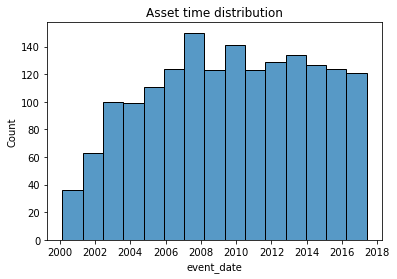

In [15]:
time = df.groupby('event_date', as_index=False).agg({'event_id': 'count'})

sns.histplot(data=time, x='event_date').set(title='Asset time distribution')

### Team Analysis

<AxesSubplot:xlabel='asset_install_team', ylabel='count'>

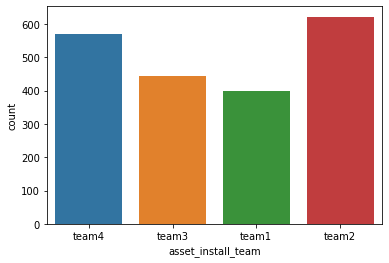

In [16]:
sns.countplot(data=df, x='asset_install_team')

### Asset damage analysis

In [17]:
damage = df.groupby('asset_id', as_index=False).agg({'event_id': 'count', 'asset_material': 'max', 'last_maintenance': 'mean', 'asset_weather_cluster': 'max', 'asset_trains_per_hour': 'max'})
damage.head(5)

,asset_id,event_id,asset_material,last_maintenance,asset_weather_cluster,asset_trains_per_hour
0,A:05y6pa,11,alloy,238.636364,standard,8.0
1,A:07o72w,3,steel,208.000000,rain,1.0
2,A:0dg9zy,16,alloy,114.500000,rain,4.0
3,A:0omw8r,6,steel,123.833333,snow,4.0
4,A:0prdc5,2,alloy,222.500000,rain,4.0


[Text(0.5, 1.0, 'Asset damage distribution')]

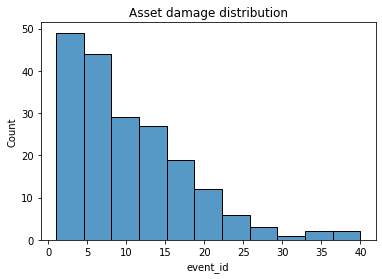

In [18]:
sns.histplot(data=damage, x='event_id').set(title='Asset damage distribution')

#### Which material has less repairments/replacements?


[Text(0.5, 1.0, 'Asset material damage distribution')]

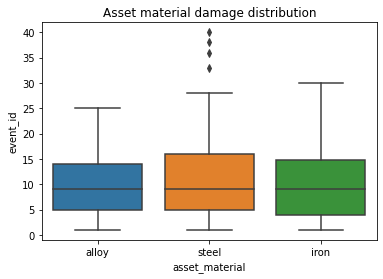

In [19]:
sns.boxplot(data=damage, x='asset_material', y='event_id').set(title='Asset material damage distribution')

#### Does the weather make any influence?

Again, it would be better to have more data around the weather. Each asset has only one weather cluster and it is possible to have more information.

[Text(0.5, 1.0, 'Asset weather damage distribution')]

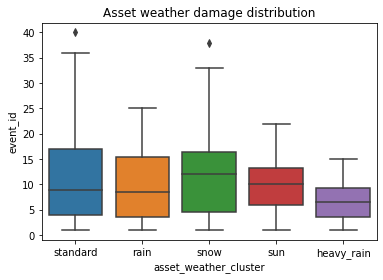

In [20]:
sns.boxplot(data=damage, x='asset_weather_cluster', y='event_id').set(title='Asset weather damage distribution')

#### Does the number of trains make a difference?

For this question would be relevant to know which kind of trains (passengers/cargo) and how much heavy they are

[Text(0.5, 1.0, 'Asset number trains damage distribution')]

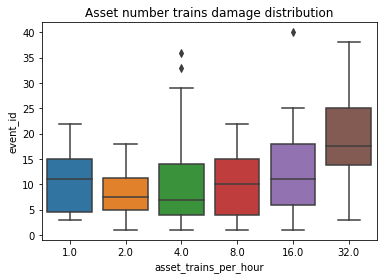

In [21]:
sns.boxplot(data=damage, x='asset_trains_per_hour', y='event_id').set(title='Asset number trains damage distribution')

## Data Manipulation & Preparation

Before starting to try to create models I need to understand what I really want to predict.

In this dataset each row represents a repairment, which is my label. But this causes a problem, I only have one label class. With this I can't feed the model with timestep where wasn't a need to repair. Which means I need to create timesteps that havent been recorded.

Also I only have day time data, so it makes not to much sense to predict every minute if an asset is going to be broken. For that reason I will analyse the data by week. (Actually we propose this to Eliano). Every week there will be a batch predict to understand which asset needs repairment.

I follow similar approach from the following book: https://www.oreilly.com/library/view/practical-time-series/9781492041641/

In [22]:
df_2 = df.copy() # Copy dataset to a new variable, just in case

# I will drop 'event_id' which is no more relevant from now on and planned as well.
# Why? Because the dataset has already "previous_unplanned" which can give almost the same information
df_2 = df_2.drop(['event_id', 'planned'], axis=1)

# I will create two new columns, "is_repair" and "is_replacement" and fill with the right values
df_2['is_repair'] = 1
for i, row in df_2.iterrows():
    if row['is_replacement'] == 1:
        df_2.at[i,'is_repair'] = 0

# Now, I have to shift all the timestamps to correspond to weekly
df_2['installed_date'] = df_2['installed_date'] + pd.offsets.Week(weekday=6)
df_2['event_date'] = df_2['event_date'] + pd.offsets.Week(weekday=6)

# Sort by asset_id and event_date to have and organized dataset
df_2 = df_2.sort_values(by=['asset_id', 'event_date'])
df_2.head(10)

,asset_id,asset_install_team,asset_line,asset_material,asset_trains_per_hour,asset_weather_cluster,event_date,installed_date,previous_repairs,previous_unplanned,is_replacement,last_maintenance,is_repair
1864,A:05y6pa,team1,east_line,alloy,8.0,standard,2008-11-30,2006-08-13,1.0,1.0,0.0,842,1
1870,A:05y6pa,team1,east_line,alloy,8.0,standard,2009-03-29,2008-11-30,0.0,0.0,1.0,119,0
1871,A:05y6pa,team1,east_line,alloy,8.0,standard,2009-12-06,2009-03-29,0.0,0.0,1.0,251,0
1872,A:05y6pa,team1,east_line,alloy,8.0,standard,2010-11-14,2009-12-06,0.0,0.0,1.0,345,0
1873,A:05y6pa,team1,east_line,alloy,8.0,standard,2011-03-06,2010-11-14,0.0,0.0,1.0,112,0
1865,A:05y6pa,team1,east_line,alloy,8.0,standard,2011-04-24,2011-03-06,1.0,1.0,0.0,51,1
1866,A:05y6pa,team1,east_line,alloy,8.0,standard,2011-08-14,2011-04-24,2.0,2.0,0.0,107,1
1867,A:05y6pa,team1,east_line,alloy,8.0,standard,2012-04-29,2011-08-14,3.0,3.0,0.0,259,1
1868,A:05y6pa,team1,east_line,alloy,8.0,standard,2012-12-09,2012-04-29,4.0,3.0,0.0,224,1
1869,A:05y6pa,team1,east_line,alloy,8.0,standard,2013-09-29,2012-12-09,5.0,4.0,0.0,296,1


In [23]:
from tqdm import tqdm

# Create all the possible weeks from the begging to the end of the dataset
week_date = pd.date_range(df.event_date.min(), df.event_date.max(), freq='W').to_series()

# Create all possible combinations of dates and assets_ids
complete_idx = pd.MultiIndex.from_product([week_date, set(df_2.asset_id)]).to_frame(index=False)
complete_idx.columns = ['event_date', 'asset_id']
complete_idx['is_repair'] = 0
complete_idx['is_replacement'] = 0

# Iterate the Dataframe and add all the possible dates for each dataset
asset_ids = df_2['asset_id'].to_list()
for id in tqdm(asset_ids):

    # Remove all rows from each asset_id if time is before or after time register
    asset_min_date = df_2.loc[df_2['asset_id'] == id].event_date.min()
    asset_max_date = df_2.loc[df_2['asset_id'] == id].event_date.max()
    complete_idx.drop(complete_idx.loc[complete_idx['asset_id'] == id][complete_idx['event_date'] < asset_min_date].index, inplace=True)
    complete_idx.drop(complete_idx.loc[complete_idx['asset_id'] == id][complete_idx['event_date'] > asset_max_date].index, inplace=True)

# Merge the complete index with the dataset and use bfill to populate empty values. Like this I know that all values are propriely matching each
final_df = pd.merge(df_2, complete_idx, on=['asset_id', 'event_date', 'is_repair', 'is_replacement'], how='outer').sort_values(['asset_id', 'event_date']).fillna(method='bfill')

# Last row from each asset_id got filled with wrong values, for this reason I need to remove them
for id in tqdm(asset_ids):
    final_df.drop(final_df.loc[final_df['asset_id'] == id].tail(1).index, inplace=True)

final_df['last_maintenance'] = final_df['event_date'] - final_df['installed_date']
final_df[final_df['asset_id'] == 'A:05y6pa'].sort_values(by=['event_date'])

100%|██████████| 2032/2032 [00:21<00:00, 96.32it/s] 


,asset_id,asset_install_team,asset_line,asset_material,asset_trains_per_hour,asset_weather_cluster,event_date,installed_date,previous_repairs,previous_unplanned,is_replacement,last_maintenance,is_repair
0,A:05y6pa,team1,east_line,alloy,8.0,standard,2008-11-30,2006-08-13,1.0,1.0,0.0,840 days,1
17087,A:05y6pa,team1,east_line,alloy,8.0,standard,2008-11-30,2008-11-30,0.0,0.0,0.0,0 days,0
17132,A:05y6pa,team1,east_line,alloy,8.0,standard,2008-12-07,2008-11-30,0.0,0.0,0.0,7 days,0
17178,A:05y6pa,team1,east_line,alloy,8.0,standard,2008-12-14,2008-11-30,0.0,0.0,0.0,14 days,0
17226,A:05y6pa,team1,east_line,alloy,8.0,standard,2008-12-21,2008-11-30,0.0,0.0,0.0,21 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29274,A:05y6pa,team1,east_line,alloy,8.0,standard,2013-07-21,2012-12-09,5.0,4.0,0.0,224 days,0
29317,A:05y6pa,team1,east_line,alloy,8.0,standard,2013-07-28,2012-12-09,5.0,4.0,0.0,231 days,0
29360,A:05y6pa,team1,east_line,alloy,8.0,standard,2013-08-04,2012-12-09,5.0,4.0,0.0,238 days,0
29405,A:05y6pa,team1,east_line,alloy,8.0,standard,2013-08-11,2012-12-09,5.0,4.0,0.0,245 days,0


## Model
With the dataset ready, I will start now to build and experiment different models

In [24]:
# Remove unnecessary columns
ml = final_df.drop(['asset_id', 'asset_line', 'asset_install_team', 'is_replacement', 'previous_unplanned', 'event_date', 'installed_date'], axis=1)
ml.describe()

,asset_trains_per_hour,previous_repairs,last_maintenance,is_repair
count,35219.000000,35219.000000,35219,35219.000000
mean,8.260570,0.683126,141 days 16:06:43.963769556,0.021664
std,8.353928,1.047697,159 days 21:54:51.172473048,0.145587
min,1.000000,0.000000,-378 days +00:00:00,0.000000
25%,4.000000,0.000000,35 days 00:00:00,0.000000
50%,4.000000,0.000000,91 days 00:00:00,0.000000
75%,8.000000,1.000000,196 days 00:00:00,0.000000
max,32.000000,6.000000,1365 days 00:00:00,1.000000


In [25]:
# Make sure the dtypes are all ready for the model
ml['last_maintenance'] = ml['last_maintenance'].dt.days
ml.drop(ml.loc[ml['last_maintenance'] < 0].index)
ml = pd.get_dummies(ml, drop_first=True)
ml.dtypes

asset_trains_per_hour             float64
previous_repairs                  float64
last_maintenance                    int64
is_repair                           int64
asset_material_iron                 uint8
asset_material_steel                uint8
asset_weather_cluster_rain          uint8
asset_weather_cluster_snow          uint8
asset_weather_cluster_standard      uint8
asset_weather_cluster_sun           uint8
dtype: object

### Data correlation

<AxesSubplot:>

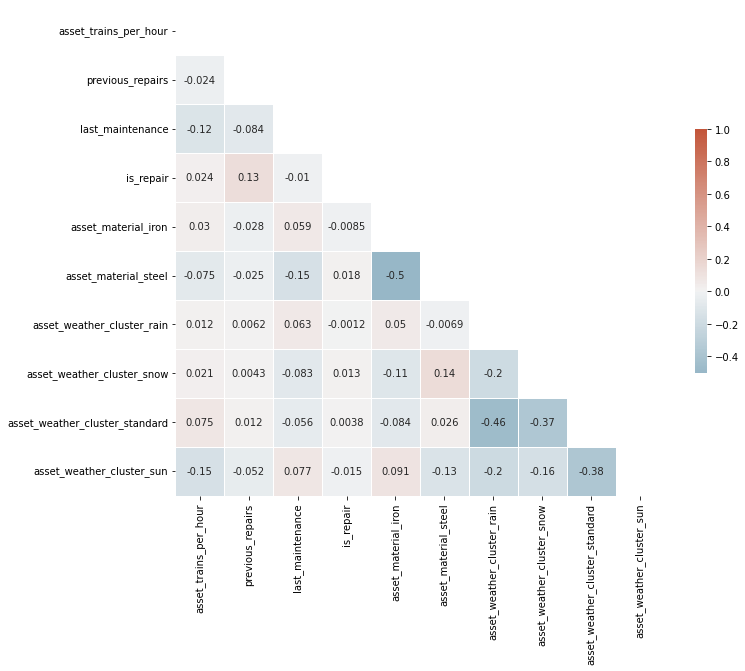

In [26]:
corr = ml.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Train test split

Now this dataset is cleary unbalanced, I will use SMOTE to over sample some of y labels.

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = ml.drop(['is_repair'], axis=1)
y = ml['is_repair']

over = SMOTE(sampling_strategy=0.2)
# transform the dataset
X_resample, y_resample = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(28942, 9)
(28942,)
0    24128
1     4814
Name: is_repair, dtype: int64


### Logistic Regression

I will try some models, the one with best results it will be choosen

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[9933,  395],
       [1095,  982]], dtype=int64)

### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(20, weights='distance')
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10019,   309],
       [  624,  1453]], dtype=int64)

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10087,   241],
       [  309,  1768]], dtype=int64)

Looks like random forest is the best model so far. I will do a RandomizedSearchCV to find the best parameters.

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5,10,50,100],
    'criterion': ['gini', 'entropy']
}

grid = RandomizedSearchCV(model, param_grid, cv=5)

grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 500]})

In [32]:
grid.best_params_

{'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 100,
 'criterion': 'entropy'}

In [33]:
model = RandomForestClassifier(n_estimators=500, max_features='sqrt', max_depth=100, criterion='entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10075,   253],
       [  311,  1766]], dtype=int64)

#### Precision, Recall and F1 Score

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision Score, Recall Score and F1 Score
precision_score_p = precision_score(y_test, y_pred)
print('Precision Score: ', precision_score_p)

recall_score_p = recall_score(y_test, y_pred)
print('Recall Score: ', recall_score_p)

f1_score_p = f1_score(y_test, y_pred)
print('F1 Score: ', f1_score_p)

Precision Score:  0.8746904408122833
Recall Score:  0.8502648050072219
F1 Score:  0.8623046874999999


#### Precision Recall Curve

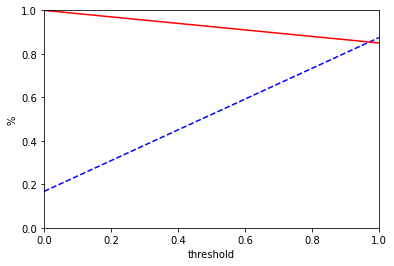

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
    plt.xlabel('threshold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('%')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

#### Roc Curve

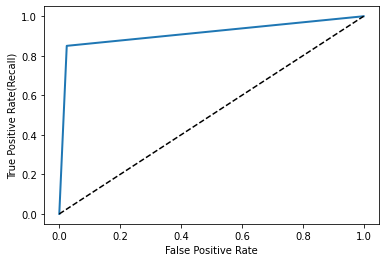

ROC AUC Score:  0.9128841453386225


In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# plot the Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate(Recall)')

plot_roc_curve(fpr, tpr)
plt.show()

print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

The AUC score is quite high, which can be a bad sign... I believe I don't have any data leakage, or future leakage in this approach. Each row represents a time step and doesn't contain future information. If I did a multi time step, I would start to believe on that.

Also there is many different asset on this dataset, so it not it can't give future information.

#### Feature Importance

[]

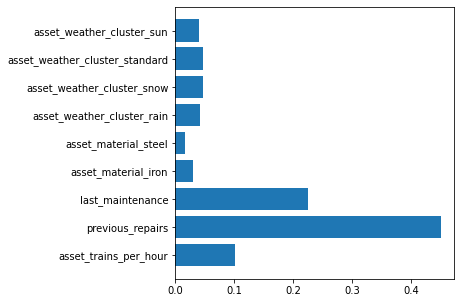

In [37]:
from matplotlib.pyplot import figure
columns = list(X_train.columns)
features_importance = model.feature_importances_
figure(figsize=(5, 5))
plt.barh(columns, features_importance)
plt.plot()

#### Model predictions data visualization

I will say the truth, I would like to explore more this subject, but I would need more time. Also unsupervised learning is subject that we will start next week

Text(0.5, 1.0, 'With feature scaling')

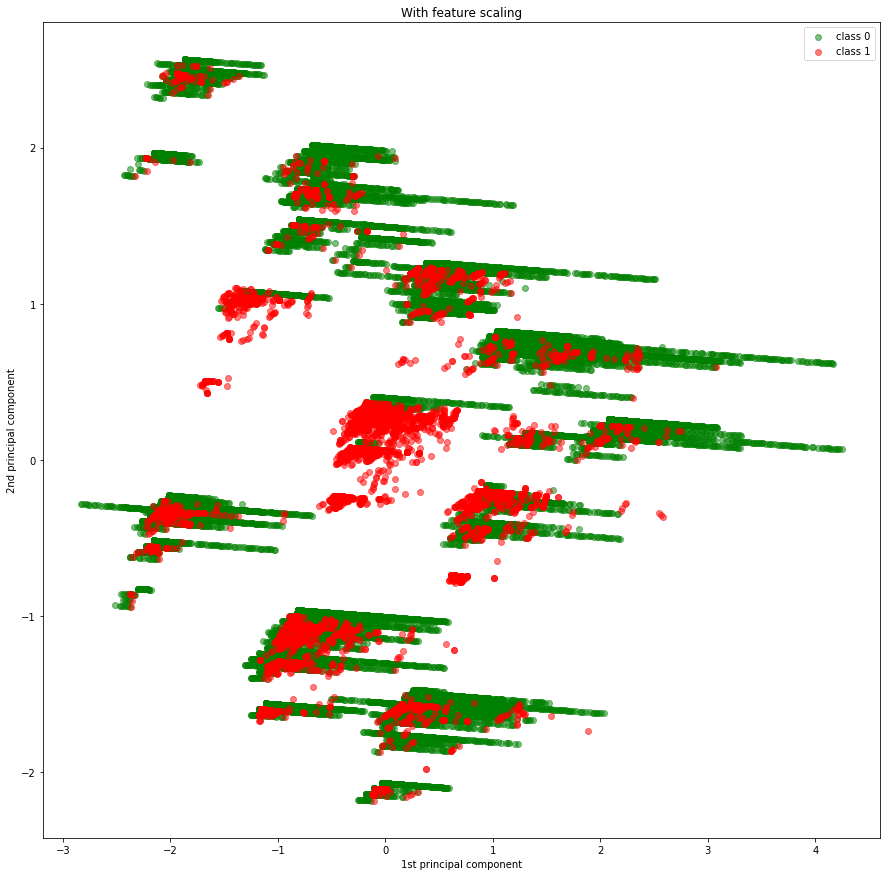

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), RandomForestClassifier())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

pca_std = std_clf.named_steps["pca"]

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)

X_train_std_transformed = pca_std.transform(scaled_X_train)

plt.close('all')
fig, ax = plt.subplots(figsize=(15,15))

target_classes = range(0, 2)
colors = ("green", "red")
markers = ("o", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )


ax.set_xlabel("1st principal component")
ax.set_ylabel("2nd principal component")
ax.legend(loc="upper right")
ax.set_title("With feature scaling")

## What is next?

Now every week it is possible to make a batch prediction to understand which assets need repairments. The team will receive a list of possible breaks in the equipment.

This machine learning model and approach is not suitable for real time prediction. I believe that the data in this dataset is very poor to do that. For each asset there is a general information about weather and number of trains. It could have more real time data, like every day temperature (min, max), how many passengers in the train, if it is cargo trains,...

For that approach we would need to have better data and better model. I will also suggest to build a multivariate time series forecast. An good example and resource: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

I could also try more models and do more testing, but I believe that data preparation is the key for a good prediction. I also know that RandomForest is very good with tabular data. I could try XGBoost but it would require more time and expermiment.

I also believe that the model that I built can be a good MVP. It would need continuous update.

Was fun to build this small project,

Errol, thanks for the lectures!

med vänliga hälsningar! (?!)

João Simões

## References

**Practical Time Series Analysis**, by Aileen Nielsen,Released October 2019, Publisher(s): O'Reilly Media, Inc.
**Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition**, by Aurélien Géron, Released September 2019, Publisher(s): O'Reilly Media, Inc.
**How to Convert a Time Series to a Supervised Learning Problem in Python**, https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/